In [1]:
from math import sqrt
from scipy import stats
from pydataset import data
from datetime import datetime, timedelta

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import viz # curriculum visualization examples
from math import sqrt

# Hypothesis Testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?

Many people have likely heard the term latency being used before but what is latency exactly? In terms of network latency, this can be defined by the time it takes for a request to travel from the sender to the receiver and for the receiver to process that request. In other words, the round trip time from the browser to the server. It is obviously desired for this time to remain as close to 0 as possible, however, there can be a few things at play preventing your website latency times to remain low.

data sources: 
* Measure time it take to send data
* Measure time it takes website to load
* Measure the Rount Trip Time (RTT)
* Measure the Time to First Byte (TTFB)
    * $H_0$: The TTFB is the same since we switched internet service providers
    * $H_a$: The TTFB is lower (closer to 0) since we switched internt service providers
    
- True Negative:
    - high p- value
    - fail to reject $H_0$
    - old provider TTFB == new provider TTFB
- False Negative:
    - high p-value
    - fail to reject $H_0$
    - old provider TTFB == new provider TTFB
    - but really we might be pinging only some of the routers, causing us to get false information
- True Positive:
    - low p-value
    - reject $H_0$
    - new provider TTFB == 0.5
    - old provider TTFB == 1.0
- False Positive:
    - low p-value
    - reject $H_0$
    - new provider TTFB == 0.5
    - old provider TTFB == 1.0
    - we might be looking at a small sample, and when we look at the avg over multiple trials it actually turns out there is no difference.

## Is the website redesign any good?

data sources:
* customer servey
* SEO optimization rankings
* google trends
* sales impact
* click-through rates / number of visitors
    * $H_0$: There has been no chance in the number of visitors since the website redesign 
    * $H_a$: There is a higher number of website vistors since the website redisgn
    
- True Negative: 
    * high p-value
    * we accept the $H_0$
    * website vistors before redisign == website vistors after redesign
- False Negative:
    * high p-value
    * accept the $H_0$
    * The data could include figures from other countries where the redesign hasn't taken place, and this is boosting the number of visitors prior to the redesign
    * We might not be allowing enough time marketing to annouce the new redesigns
- True Positive:
    * Low p-value
    * reject $H_0$
    * vistors after website redesign -> 150,000
    * visitors before website redesign -> 100,000
- False positive: 
    * low p-value
    * reject $H_0$
    * vistors after website redesign -> 150,000
    * visitors before website redesign -> 100,000
    * Website visits could be boosted by a sales promotions, and once the promotion ends, visits decrease 
    



## Is our television ad driving more sales?

data sources:
* sales before and after ad
* google trends
* store footfall
* website visitors
* recall survey
    * $H_0$: There is no difference in survey responses between customers that recall the ad, versus customers that didn't recall the ad
    * $H_a$: Customers that recall the ad were more likely to say they would buy the product
    
- True Negative: 
    * high p-value
    * fail to reject $H_0$
    * \# of people willing to buy our product and recall ad == \# of people willing to buy our product and don't recall ad
    
- False Negative:
    * high p-value
    * fail to reject $H_0$
    * There could be observer bias, where customers are equally likely to say they will buy the product, but this might not necesarly reflect their actual behavior
    
- True positive:
    * low p-value
    * reject $H_0$
    * \# of customers willing to buy our product and recall ad == 20
    * \# of customers willing to buy our product and don't recall ad == 10
    
- False positive:
    * low p-value
    * reject $H_0$
    * undercoverage biase - we might have only sample a portion of the population that that watches TV, and we are not considering what customers that don't watch TV are thinking

# Exercise 2: T - Test

## Question 1:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

* $H_0$: There is no difference in the average of time it takes to sell homes between the two offices in Ace Realty
* $H_a$: There is a difference in the average of time it takes to sell homes between the two offices

Data sources: 
   * Internal sales data

In [2]:
# Office 1:

xbar1 = 90
s1 = 15
n1 = 40

# office 2:

xbar2 = 100
s2 = 20
n2 = 50

degf = (n1 + n2) - 2

s_p = sqrt(
    ((n1 - 1) * s1**2 + (n2 - 1) * s2**2)
    /
    (n1 + n2 - 2)
)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))

p = stats.t(degf).cdf(t) * 2

t, p

(-2.6252287036468456, 0.01020985244923939)

In [3]:
t, p = stats.ttest_ind_from_stats(xbar1, s1, n1, xbar2, s2, n2)

In [4]:
alpha = 0.05

print(f'''
Becasue p ({p:.6f}) < alpha ({alpha}), we reject the null hypothesis, meaning that there is a significant difference in average time to sell a home between the two branches''')


Becasue p (0.010210) < alpha (0.05), we reject the null hypothesis, meaning that there is a significant difference in average time to sell a home between the two branches


## Question 2.
Load the mpg dataset and use it to answer the following questions:

In [5]:
mpg = data('mpg')

In [6]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

* $H_0$: There is no difference in fuel efficiency between cars from 2008 vs 1999
* $H_a$: Cars from 2008 have a better fuel efficienct than cars from 1999

In [7]:
mpg["fuel_efficiency"] = (mpg["cty"] + mpg["hwy"]) / 2

In [8]:
x1 = mpg[mpg.year == 1999].fuel_efficiency
x2 = mpg[mpg.year == 2008].fuel_efficiency

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

Because the p value (0.826) > alpha (0.05), we fail to reject the null hypothesis. 

This means that there is no statistical difference between cars from 1999 and 2008

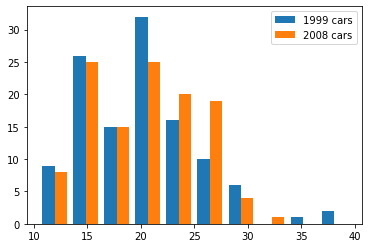

In [9]:
plt.hist([x1, x2], label=["1999 cars", "2008 cars"])
plt.legend(loc="upper right")

### Are compact cars more fuel-efficient than the average car?


* $H_0$: There is no significant difference in fuel-efficiency between compact cars and the average car
* $H_a$: Compact cars are on average more fuel- efficient than the average car

In [10]:
x = mpg[mpg["class"] == "compact"].fuel_efficiency
mu = mpg.fuel_efficiency.mean()

t_stat, p = stats.ttest_1samp(x, mu)

print(f't = {t_stat:.3}')
print(f'p = {p:.10f}')

t = 7.9
p = 0.0000000004


In [11]:
x.mean(), mu

(24.21276595744681, 20.14957264957265)

The p value is below the alpha, which means we reject the null hypothesis that compact cars, on average, have the same fuel-efficiency as the average car. 

### Do manual cars get better gas mileage than automatic cars?

* $H_0$: There is no difference in gas mileage between manual and automatic cars
* $H_a$: There is a difference in gas mileage between manual and automatic cars

In [12]:
x1 = mpg[mpg.trans.str.contains("auto")].fuel_efficiency
x2 = mpg[mpg.trans.str.contains("manual")].fuel_efficiency

t, p = stats.ttest_ind(x1,x2)

print(f"t = {t}")
print(f"p = {p:.6f}")

t = -4.593437735750014
p = 0.000007


In [13]:
print(f"avg fuel effienct for automatic cars: {x1.mean():.3}, and manual: {x2.mean():.3}")

avg fuel effienct for automatic cars: 19.1, and manual: 22.2


Becasue the p value is smaller than that alpha, we can reject the null hypothesis that there is no difference between transmission and fuel efficiency. 

For this particular case, it seems that manual cars are significantly different, on average, than automatic cars when it comes to fuel efficiency.

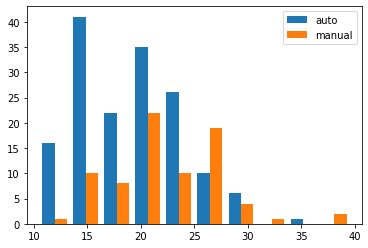

In [14]:
plt.hist([x1,x2], label = ["auto", "manual"])
plt.legend()

What if we wanted to see if the manual cars, on average, had better fuel efficiency? 

In [15]:
x = mpg[mpg.trans.str.contains("manual")].fuel_efficiency
mu = mpg.fuel_efficiency.mean()

t_stat, p = stats.ttest_1samp(x,mu)

print(f"t = {t_stat:.3}")
print(f"p = {p:.3}")

t = 3.53
p = 0.000703


Because the p value is still lower than alpha, we can conclude that there is infact a significant difference in fuel efficiency between manual cars and the rest.

# Correlation Exercises

## 1.  Use the `telco_churn data`

Does tenure correlate with monthly charges? 

In [16]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/telco_churn'

sql = '''
SELECT * 
FROM customers
'''

customers = pd.read_sql(sql, url)

In [17]:
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


* $H_0$: There is no linear corraltion between tenur and monthly charges
* $H_0$: There is a linear correlation between tenure and monthly charges

In [18]:
x = customers.tenure
y = customers.monthly_charges

corr, p = stats.pearsonr(x,y)

print(f"corr = {corr}")
print(f" p = {p:.10f}")

corr = 0.24789985628615008
 p = 0.0000000000


In [19]:
print(f'''
Becasue p {p} is less than $\alpha$ (0.05), we reject the null 
hypythesis, and assume that there a linear correlation between tenure 
and monthly charges. 
''')
      


Becasue p 4.0940449915016345e-99 is less than $lpha$ (0.05), we reject the null 
hypythesis, and assume that there a linear correlation between tenure 
and monthly charges. 



Total charges? 

* $H_0$: There is no linear correlation between total charges and tenure
* $H_a$: There is a linear correlation between total charges and tenure

In [20]:
# customers.total_charges.astype(np.float64)

In [21]:
customers[customers.total_charges != ' '].sort_values(by = "total_charges")

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
4386,6180-YBIQI,Male,0,No,No,5,No,No phone service,1,No,...,No,No,No,No,1,No,2,24.30,100.2,No
2222,3178-FESZO,Female,0,No,No,1,Yes,Yes,2,No,...,No,No,Yes,Yes,1,Yes,4,100.25,100.25,Yes
1771,2587-YNLES,Female,0,Yes,Yes,6,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,3,No,2,20.10,100.35,No
5542,7802-EFKNY,Male,0,Yes,No,5,No,No phone service,1,No,...,No,No,No,No,1,Yes,1,24.95,100.4,Yes
5126,7216-EWTRS,Female,1,Yes,No,1,Yes,Yes,2,No,...,Yes,No,Yes,Yes,1,Yes,1,100.80,100.8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5868,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,2,19.40,997.75,No
4298,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,4,19.15,998.1,No
4173,5899-MQZZL,Female,0,No,No,13,Yes,Yes,2,No,...,No,No,No,No,1,Yes,2,75.00,999.45,Yes
3162,4536-PLEQY,Male,0,Yes,No,12,Yes,No,2,No,...,No,No,No,Yes,1,Yes,4,85.05,999.8,No


In [22]:
total_charges = customers[customers.total_charges != ' '].total_charges.astype(float)
tenure = customers[customers.total_charges != ' '].tenure

In [23]:
x = tenure
y = total_charges

corr, p = stats.pearsonr(x,y)

print(f"corr = {corr}")
print(f" p = {p}")

corr = 0.825880460933202
 p = 0.0


We reject the null hypothesis - and there is actually a very high corr score, meaning this has a stronger relationship than monthly charges. 

What happens if you control for phone and internet service?

* $H_0$: There is no difference in correlation between monthly charges and tenure when looking at controls vs joined group
* $H_a$: There is a difference in correlation between monthly charges and tenure when looking at at controls vs joined group

In [24]:
[customers.internet_service_type_id != 0]

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 7038    True
 7039    True
 7040    True
 7041    True
 7042    True
 Name: internet_service_type_id, Length: 7043, dtype: bool]

In [25]:
phone_y = customers.phone_service == "Yes"
internet_y = customers.internet_service_type_id != 3
phone_n = customers.phone_service == "No"
internet_n = customers.internet_service_type_id == 3



both = customers[phone_y & internet_y].monthly_charges
both_tenure = customers[phone_y & internet_y].tenure


phone = customers[phone_y & internet_n].monthly_charges
internet = customers[phone_n & internet_y].monthly_charges
tenure_phone = customers[phone_y & internet_n].tenure
tenure_internet = customers[phone_n & internet_y].tenure

In [26]:
# phone_y = customers.phone_service == "Yes"
# internet_y = customers.internet_service_type_id != 3
# phone_n = customers.phone_service == "No"
# internet_n = customers.internet_service_type_id == 3



# both = customers[phone_y & internet_y].monthly_charges
# both_tenure = customers[phone_y & internet_y].tenure

In [27]:
r_phone, p_phone = stats.pearsonr(phone, tenure_phone)
r_internet, p_internet = stats.pearsonr(internet, tenure_internet)
r_both, p_both = stats.pearsonr(both, both_tenure)

In [28]:
p_phone, p_internet, r_both

(3.356186955197392e-43, 4.603370347342836e-64, 0.44311476672821826)

In [29]:
print('Correlation between monthly charges and tenure for phone users')
print(f'  r = {r_phone:.3f}, p {p_phone:.3}')
print('Correlation between monthly charges and tenure for internet users')
print(f'  r = {r_internet:.3f}')
print('Correlation between monthly charges and tenure for internet users and phone users')
print(f'  r = {r_both:.3f}')

Correlation between monthly charges and tenure for phone users
  r = 0.342, p 3.36e-43
Correlation between monthly charges and tenure for internet users
  r = 0.586
Correlation between monthly charges and tenure for internet users and phone users
  r = 0.443


We conclude that actually our p values for phone_only users and internet_only users are lower than our alpha, which means we can reject our null hypothesis that all controls have a similar correlation

## 2. Use the employees database.

### Is there a relationship between how long an employee has been with the company and their salary?


* $H_0$: There is no linear relationship between how long an employee has been with the company and their salary
* $H_a$: There is a linear relationship between how long an employee has been with the company and their salary

In [30]:
from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

sql = '''
SELECT emp_no, hire_date, salary, title
FROM employees
JOIN salaries USING (emp_no)
JOIN titles USING (emp_no)
WHERE salaries.to_date > NOW()
'''

employees = pd.read_sql(sql, url)

In [31]:
employees.hire_date = pd.to_datetime(employees.hire_date, format="%Y %m %d")

In [32]:
curr_date = "2020-03-25"
employees["time_since_hire"] = datetime.strptime(curr_date, '%Y-%m-%d') - employees.hire_date

In [33]:
employees['total_days_td'] = employees['time_since_hire'] / pd.to_timedelta(1, unit='D')

In [55]:
employees.head()

,emp_no,hire_date,salary,title,time_since_hire,total_days_td
0,10001,1986-06-26,88958,Senior Engineer,12326 days,12326.0
1,10002,1985-11-21,72527,Staff,12543 days,12543.0
2,10003,1986-08-28,43311,Senior Engineer,12263 days,12263.0
3,10004,1986-12-01,74057,Engineer,12168 days,12168.0
4,10004,1986-12-01,74057,Senior Engineer,12168 days,12168.0


In [34]:
x = employees.total_days_td
y = employees.salary

corr, p = stats.pearsonr(x, y)

print(f"corr = {corr}")
print(f"p = {p}")

corr = 0.30728190932146743
p = 0.0


We can conclude that becasue the p value is smaller than our alpha, there is a correlation between legnth of time at the company and salary.

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

* $H_0$: There is no relationship between how long an employee has been with teh company and the number of titles they have had

* $H_a$: There is a relationship between how long an employee has been with the company and the number of titles they have had

In [35]:
number_titles = employees.groupby(["emp_no"])[["title","total_days_td"]].count()

number_titles

,title,total_days_td
emp_no,,
10001,1,1
10002,1,1
10003,1,1
10004,2,2
10005,2,2
...,...,...
499995,1,1
499996,2,2
499997,2,2


In [36]:
emp_w_titles = employees.merge(number_titles, left_on="emp_no", right_on=number_titles.index, how="inner")

In [37]:
short_df = emp_w_titles[["emp_no", "total_days_td_x", "title_y"]]
short_df.head()

,emp_no,total_days_td_x,title_y
0,10001,12326.0,1
1,10002,12543.0,1
2,10003,12263.0,1
3,10004,12168.0,2
4,10004,12168.0,2


In [38]:
short_df.drop_duplicates(subset="emp_no", keep="first", inplace = True)

short_df

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,emp_no,total_days_td_x,title_y
0,10001,12326.0,1
1,10002,12543.0,1
2,10003,12263.0,1
3,10004,12168.0,2
5,10005,11152.0,2
...,...,...,...
371235,499995,9934.0,1
371236,499996,10772.0,2
371238,499997,12392.0,2
371240,499998,9660.0,2


In [39]:
x = short_df.total_days_td_x
y = short_df.title_y

corr, p = stats.pearsonr(x,y)

corr, p

(0.2871267889699718, 0.0)

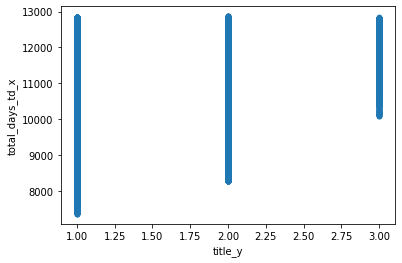

In [40]:
short_df.plot.scatter(x="title_y", y="total_days_td_x")

Because our p value is 0, we can reject the null hypothesis. However, because our correlation is relatively weak, we know that there isn't a super strong correlation between both groups. Our p value is low probable more due to the fact that we have such a large number of rows (over 200K).

## # 3. Use the sleepstudy data. Is there a relationship between days and reaction time?

* $H_0$: There is not linear relatioship between number of days without sleep and reaction time

* $H_a$: There is a linear relatioship between number of days without sleep and reaction time

In [41]:
sleep = data('sleepstudy')

In [42]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [43]:
x = sleep["Reaction"]
y = sleep["Days"]

corr, p = stats.pearsonr(x,y)

print(f"corr = {corr}")
print(f"p = {p:.5}")

corr = 0.5352302262650253
p = 9.8941e-15


We can reject the null hypothesis, and can conclude that there is a linear correlation between number of days without sleep and the reaction time. 

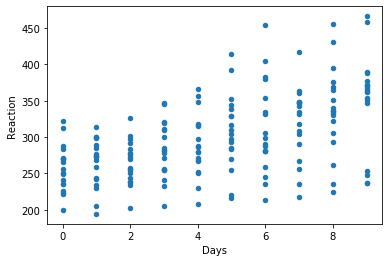

In [57]:
sleep.plot.scatter("Days", "Reaction")

# Questions: 

1. What do we mean by "control"?
1. Is a correlation closer to 1 or -1 better?
1. For number of titles - why do I have a p value of zero?